# neuron_beta -- MOs single projection vs. population projection

In [13]:
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr

In [6]:
material_path = r"E:\ZhixiYun\Projects\Neuron_Morphology_Table\Materials"

df_subtype = pd.read_csv(os.path.join(material_path, 'cell_type/c_type','ctype_unmirrored.csv'),index_col=0)
df_subtype.dropna(how='any',axis=0,inplace=True)
df_subtype.sort_values(by='detail ctype', inplace=True)


df_ct = pd.concat([pd.read_csv(os.path.join(material_path,"cell_type/s_type","AIBS+SEU-ALLEN_Full_1741.csv"), index_col=0), 
                   pd.read_csv(os.path.join(material_path,"cell_type/s_type","MouseLight_Full_1200.csv"), index_col=0), 
                   pd.read_csv(os.path.join(material_path,"cell_type/s_type","ION_Axon_6357.csv"), index_col=0)
                  ])
df_ct.index = [x.replace('.semi_r','').replace('.auto_r','').replace('.semi_f','') for x in df_ct.index]

'''population level projection, get from (Harris, et al., 2019)'''

df_meso = pd.read_excel(os.path.join(r"E:\ZhixiYun\Projects\Neuron_Morphology_Table\Tables\Projection",
                                     "single cell_meso groups_source match_thresholded meso_hz.xlsx"), sheet_name="meso fraction HZ_selected", skiprows=5)
df_mesoscale = pd.DataFrame(np.array(df_meso.iloc[:,8:315+8])+np.array(df_meso.iloc[:,315+8:630+8]), index=df_meso["reassigned primary-layer"].values, columns=[x.split("-ipsi")[0] for x in df_meso.columns[8:315+8]])

df_single_tmp = pd.read_csv(os.path.join(material_path, 'projection_matrix/Axon', 'Axon_Projection.csv'), index_col=0)
del df_single_tmp["contra_fiber tracts"]
del df_single_tmp["ipsi_fiber tracts"]
df_single = pd.DataFrame(df_single_tmp.iloc[:,0:315].values+df_single_tmp.iloc[:,315:].values,index=df_single_tmp.index,columns=[x.split('ipsi_')[-1] for x in df_single_tmp.columns[0:315]])
df_single.index = [x.replace('.semi_r','').replace('.auto_r','').replace('.semi_f','') for x in df_single.index]

v = df_single.values
length = v.sum(axis=1)
v = (v.T/v.sum(axis=1)).T
df_single = pd.DataFrame(v,index=df_single.index,columns=df_single.columns)
df_single["celltype"] = df_ct.loc[df_single.index]["Detail CellType"]
df_single["length"] = length

df_single

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,PRM,COPY,PFL,FL,FN,IP,DN,VeCB,celltype,length
17109_1701_x8048_y22277.swc,0.056064,0.022936,0.340518,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AId6,68603.746977
17109_1801_x6698_y12550.swc,0.067602,0.133418,0.576018,0.0,0.0,0.000503,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AId6,148803.056897
17109_1901_x9602_y10508.swc,0.068603,0.000000,0.060263,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AId6,58140.933854
17109_2201_x8046_y23301.swc,0.017272,0.355042,0.294780,0.0,0.0,0.000000,0.090912,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MOs6,90075.324218
17109_2301_x8535_y23051.swc,0.000977,0.367583,0.382580,0.0,0.0,0.000000,0.140578,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AId6,60891.632101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787_044_reg.swc,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PL2/3,21715.378876
201787_045_reg.swc,0.005222,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PL5,53999.511036
201787_048_reg.swc,0.008018,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PL2/3,43603.650364
201787_050_reg.swc,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PL5,105238.936648


In [7]:
newidx = []
for idx in df_mesoscale.index:
    if idx.endswith("-"):
        idx=idx[:-1]
    idx = idx.replace('-L5_PT','5').replace('-L2/3','2/3').replace('-L4','4')
    newidx.append(idx)
df_mesoscale.index=newidx
df_mesoscale

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,SIM,AN,PRM,COPY,PFL,FL,FN,IP,DN,VeCB
MD,0.021877,0.008566,0.120201,0.000000,0.000000,0.000796,0.000000,0.000319,0.001157,0.000150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
PO,0.000573,0.120164,0.085247,0.016948,0.114998,0.056102,0.006793,0.112979,0.030484,0.044553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
SMT,0.012818,0.106288,0.119171,0.013133,0.010916,0.001238,0.034943,0.005652,0.000626,0.002200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
VM,0.020770,0.154232,0.250009,0.005578,0.010706,0.010763,0.013562,0.019185,0.003930,0.004798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
MOp2/3,0.000000,0.274539,0.039792,0.000000,0.007683,0.274742,0.000388,0.028164,0.075835,0.005644,...,0.005834,0.028744,0.008387,0.001305,0.040017,0.004327,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PVT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
PVT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0
RE,0.000015,0.000185,0.001071,0.000000,0.000000,0.000107,0.000000,0.000000,0.000111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.006513e-07,0.0,0.0
RE,0.000497,0.006622,0.020447,0.000000,0.002107,0.001905,0.000000,0.000904,0.001903,0.000252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0


In [8]:
def Neuron_beta(M, S):
    assert len(M)==len(S), "shape doesn't match..."
    M = np.array(M, dtype=np.float32)
    S = np.array(S, dtype=np.float32)
    cov = np.cov(np.stack((M, S), axis=0))[0,1]
    var = np.var(M)

    return cov/var

In [14]:
meso_thres = (np.e**0.2-1)/100
cols = np.array(df_mesoscale.columns)

NB = []
cts = []
CORR = []
counts_M = []
counts_S = []
indxx = []
insti = []

for ct in ['MOs5','MOs2/3','MOp']:
    # df_M = df_mesoscale.loc[[ct]].mean()
    df_M = df_mesoscale[df_mesoscale.index.str.contains(ct)].mean()
    
    bool_M = df_M>meso_thres
    
    df_S = df_single[df_single.celltype.str.contains(ct)].iloc[:,:-2]
    for i in range(df_S.shape[0]):
        s = df_S.iloc[i]
        s_len = s*df_single[df_single.celltype.str.contains(ct)].iloc[i,-1]
        bool_S = s_len>1000
        
        bool_final = bool_M | bool_S
        bool_final = bool_final.loc[cols]
        # cur_col = cols[bool_final]
        
        nb = Neuron_beta(df_M[bool_final], s[bool_final])
        corr = pearsonr(df_M[bool_final], s[bool_final])[0]
        
        NB.append(nb)
        cts.append(ct)
        CORR.append(corr)
        counts_M.append(len(df_mesoscale[df_mesoscale.index.str.contains(ct)]))
        counts_S.append(len(df_S))
        indxx.append(df_S.index[i])
        if df_S.index[i].startswith("AA"):
            insti.append("MouseLight")
        elif df_S.index[i].endswith("reg.swc"):
            insti.append("ION")
        else:
            insti.append("Full-SEU-AIBS")

In [15]:
df_SM = pd.DataFrame(np.array([NB,CORR,cts,counts_M,counts_S,insti]).T,columns=["nb","corr","celltype","num_M","num_S","institute"],index=indxx)
df_SM["nb"] = df_SM["nb"].astype(np.float32)
df_SM["corr"] = df_SM["corr"].astype(np.float32)
df_SM["ctype"] = df_subtype.loc[np.intersect1d(df_SM.index,df_subtype.index),'detail ctype']
df_SM["stype"] = df_ct.loc[np.intersect1d(df_SM.index,df_ct.index),'Detail CellType']
print(df_SM.shape)

(882, 8)


In [16]:
df_SM.loc[df_SM.index[df_SM.stype=='MOs2/3'],'ctype']='MOs2/3'
df_SM.loc[df_SM.index[df_SM.stype.str.contains('MOp')],'ctype'] = 'MOp'
tmpdfsm = df_SM[df_SM.stype=='MOs5'].copy()
tmpdfsm['ctype']='MOs5'
# tmpdfsm.index = np.arange(0,len(tmpdfsm),1)
df_SM=pd.concat([df_SM,tmpdfsm])
df_SM.dropna(inplace=True)
df_SM

,nb,corr,celltype,num_M,num_S,institute,ctype,stype
18047_2622_x11862_y12983.swc,2.050229,0.908878,MOs5,20,481,Full-SEU-AIBS,MOs5_1,MOs5
18047_3132_x24052_y12385.swc,1.322733,0.609899,MOs5,20,481,Full-SEU-AIBS,MOs5_1,MOs5
18047_4141_x14168_y9063.swc,0.745691,0.746999,MOs5,20,481,Full-SEU-AIBS,MOs5_1,MOs5
182724_2238_x7096_y20268.swc,1.203583,0.905300,MOs5,20,481,Full-SEU-AIBS,MOs5_1,MOs5
182724_2247_x6785_y11803.swc,0.696676,0.676317,MOs5,20,481,Full-SEU-AIBS,MOs5_1,MOs5
...,...,...,...,...,...,...,...,...
201784_003_reg.swc,1.189616,0.924935,MOs5,20,481,ION,MOs5,MOs5
201784_006_reg.swc,1.031943,0.477150,MOs5,20,481,ION,MOs5,MOs5
201784_010_reg.swc,0.680486,0.757439,MOs5,20,481,ION,MOs5,MOs5
201784_011_reg.swc,1.859492,0.919292,MOs5,20,481,ION,MOs5,MOs5


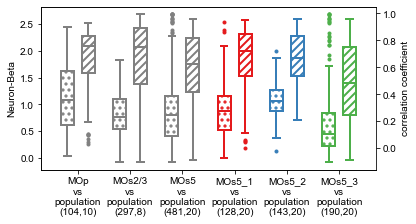

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

colorlist=sns.color_palette('Set1',3)

plt.rcParams['hatch.linewidth']=2
plt.rcParams['hatch.color']=colorlist[0]

fig, ax = plt.subplots(figsize=(6,3))
dodge=0.2
width=0.25
# ax.plot(x, y, color='green')
ax.set_ylabel('Neuron-Beta')
ax.set_xlabel('')
ax.spines['right'].set_visible(False) # ax右轴隐藏
basecolor='gray'


for i in range(3):
    ax.boxplot(df_SM[df_SM['ctype']==f'MOs5_{i+1}']['nb'].values,positions=[i+3+1-dodge],widths=width,
               patch_artist=True, boxprops={'facecolor': 'white','linestyle':'-',
                                            'linewidth':2,'edgecolor':colorlist[i],'hatch':'..'}, 
              capprops={'color':colorlist[i],'lw':2},
              medianprops={"color":colorlist[i],'lw':2},
              whiskerprops={"color":colorlist[i],'lw':2},
              flierprops={'marker':'.','markeredgecolor':colorlist[i],'markerfacecolor':colorlist[i]},
              )
    
for i,ct in enumerate(['MOp','MOs2/3','MOs5']):
    ax.boxplot(df_SM[df_SM['ctype']==ct]['nb'].values,positions=[i+0+1-dodge],widths=width,
               patch_artist=True, boxprops={'facecolor': 'white','linestyle':'-',
                                            'linewidth':2,'edgecolor':basecolor,'hatch':'..'}, 
              capprops={'color':basecolor,'lw':2},
              medianprops={"color":basecolor,'lw':2},
              whiskerprops={"color":basecolor,'lw':2},
              flierprops={'marker':'.','markeredgecolor':basecolor,'markerfacecolor':basecolor},
              )
# ax.boxplot(df_SM[df_SM['ctype']=='MOs5_2']['nb'].values,positions=[2-dodge])
# ax.boxplot(df_SM[df_SM['ctype']=='MOs5_3']['nb'].values,positions=[3-dodge])

z_ax = ax.twinx()
# z_ax.plot(x, z, color='blue')
z_ax.set_ylabel('correlation coefficient')
for i in range(3):
    z_ax.boxplot(df_SM[df_SM['ctype']==f'MOs5_{i+1}']['corr'].values,positions=[i+3+1+dodge],widths=width,
               patch_artist=True, boxprops={'facecolor': 'white','linestyle':'-','linewidth':2,
                                            'edgecolor':colorlist[i],'hatch':'///'}, 
              capprops={'color':colorlist[i],'lw':2},
              medianprops={"color":colorlist[i],'lw':2},
              whiskerprops={"color":colorlist[i],'lw':2},
              flierprops={'marker':'.','markeredgecolor':colorlist[i],'markerfacecolor':colorlist[i]},
              )
    
for i,ct in enumerate(['MOp','MOs2/3','MOs5']):
    z_ax.boxplot(df_SM[df_SM['ctype']==ct]['corr'].values,positions=[i+0+1+dodge],widths=width,
               patch_artist=True, boxprops={'facecolor': 'white','linestyle':'-','linewidth':2,
                                            'edgecolor':basecolor,'hatch':'///'}, 
              capprops={'color':basecolor,'lw':2},
              medianprops={"color":basecolor,'lw':2},
              whiskerprops={"color":basecolor,'lw':2},
              flierprops={'marker':'.','markeredgecolor':basecolor,'markerfacecolor':basecolor},
              )


# z_ax.boxplot(df_SM[df_SM['ctype']=='MOs5_1']['corr'].values,positions=[1+dodge])
# z_ax.boxplot(df_SM[df_SM['ctype']=='MOs5_2']['corr'].values,positions=[2+dodge])
# z_ax.boxplot(df_SM[df_SM['ctype']=='MOs5_3']['corr'].values,positions=[3+dodge])
ax.set_xticks([1,2,3,4,5,6])

ax.set_xticklabels([f'MOp\nvs\npopulation\n({df_SM[df_SM["ctype"]=="MOp"].iloc[0,4]},{df_SM[df_SM["ctype"]=="MOp"].iloc[0,3]})',
                    f'MOs2/3\nvs\npopulation\n({df_SM[df_SM["ctype"]=="MOs2/3"].iloc[0,4]},{df_SM[df_SM["ctype"]=="MOs2/3"].iloc[0,3]})',
                    f'MOs5\nvs\npopulation\n({df_SM[df_SM["ctype"]=="MOs5"].iloc[0,4]},{df_SM[df_SM["ctype"]=="MOs5"].iloc[0,3]})',
                   f'MOs5_1\nvs\npopulation\n({len(df_SM[df_SM["ctype"]=="MOs5_1"])},{df_SM[df_SM["ctype"]=="MOs5_1"].iloc[0,3]})',
                    f'MOs5_2\nvs\npopulation\n({len(df_SM[df_SM["ctype"]=="MOs5_2"])},{df_SM[df_SM["ctype"]=="MOs5_2"].iloc[0,3]})',
                    f'MOs5_3\nvs\npopulation\n({len(df_SM[df_SM["ctype"]=="MOs5_3"])},{df_SM[df_SM["ctype"]=="MOs5_3"].iloc[0,3]})',])

# plt.savefig(r'./fig6\MOs5_neuron_beta_nofill.png',dpi=300,
#               bbox_inches='tight',facecolor="white")
plt.show()